<span style="font-size: 26px; color: #2F4F4F; font-weight: bold; padding: 5px; background-color: #FFDAB9; border: 1px solid #FFB6A6; border-radius: 3px;">Import Necessary Libraries</span>


In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')


<span style="font-size: 26px; color: #2F4F4F; font-weight: bold; padding: 5px; background-color: #FFDAB9; border: 1px solid #FFB6A6; border-radius: 3px;"> Read the Dataset</span>


In [3]:
df=pd.read_csv(r"C:\Users\Ramya Shruthi\Downloads\Dataset .csv")
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
df.shape

(9551, 21)

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

<span style="font-size: 26px; color: #2F4F4F; font-weight: bold; padding: 5px; background-color: #FFDAB9; border: 1px solid #FFB6A6; border-radius: 3px;">Checking the missing values</span>


In [29]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<span style="font-size: 26px; color: #2F4F4F; font-weight: bold; padding: 5px; background-color: #FFDAB9; border: 1px solid #FFB6A6; border-radius: 3px;"># LEVEL 1</span>


<span style="font-size: 26px; color: #2F4F4F; font-weight: bold; padding: 5px; background-color: #FFDAB9; border: 1px solid #FFB6A6; border-radius: 3px;">Task 1: Top Cuisines</span>


In [30]:
df['Cuisines'].fillna('Unknown', inplace=True)

In [31]:
df['Cuisines'].isnull().sum()

0

In [32]:
# Step 3: Split the 'Cuisines' column and explode into separate row
df['Cuisines'] = df['Cuisines'].str.split(', ')
df_exploded = df.explode('Cuisines')

In [33]:
df['Cuisines']

0                            [French, Japanese, Desserts]
1                                              [Japanese]
2                      [Seafood, Asian, Filipino, Indian]
3                                       [Japanese, Sushi]
4                                      [Japanese, Korean]
5                                               [Chinese]
6                                       [Asian, European]
7                    [Seafood, Filipino, Asian, European]
8                               [European, Asian, Indian]
9                                              [Filipino]
10                                    [Filipino, Mexican]
11                        [American, Ice Cream, Desserts]
12                                    [Filipino, Mexican]
13                                             [Filipino]
14                                               [Korean]
15                    [Cafe, American, Italian, Filipino]
16                                       [Italian, Pizza]
17            

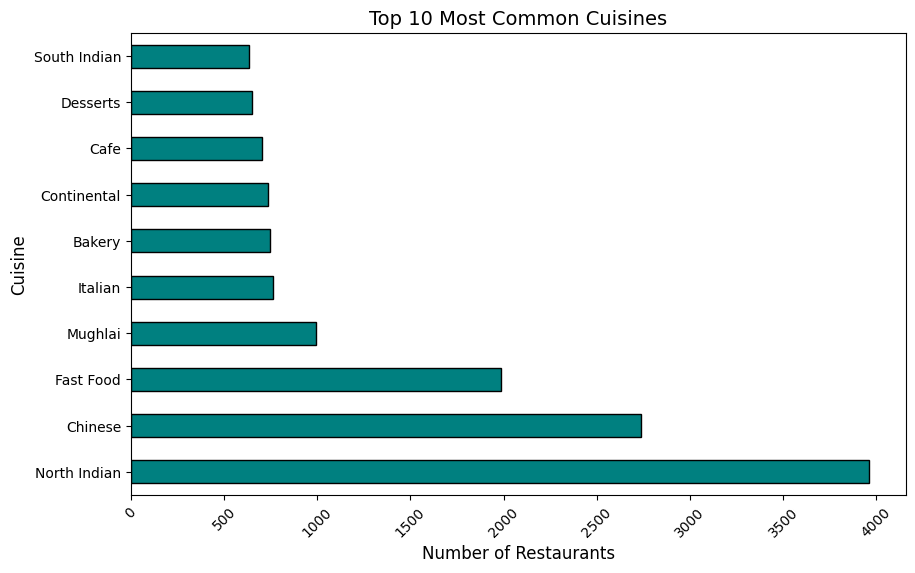

In [34]:

top_cuisines = df_exploded['Cuisines'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_cuisines.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Most Common Cuisines', fontsize=14)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [35]:

# Step 4: Count the most common cuisines
top_cuisines = df_exploded['Cuisines'].value_counts().head(3)
print("Top 3 Cuisines:\n", top_cuisines)

Top 3 Cuisines:
 Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


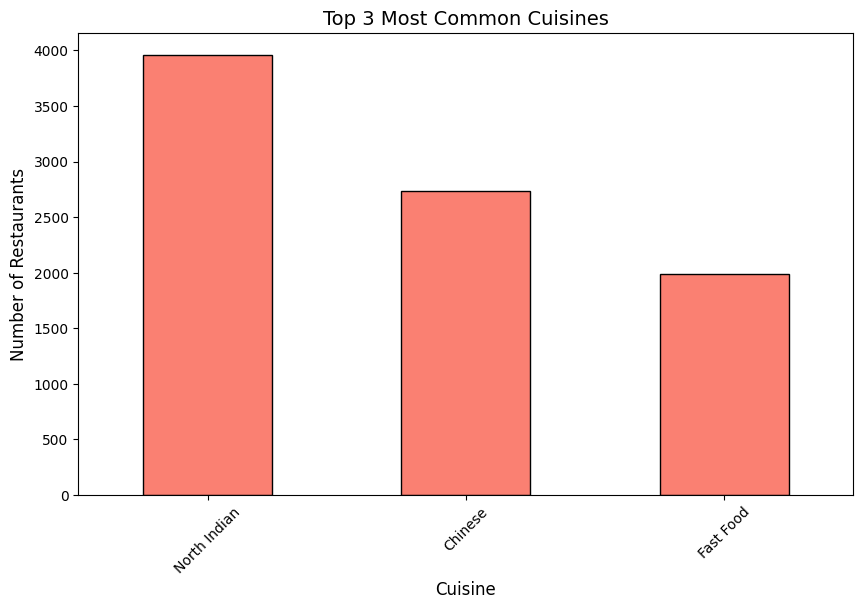

In [36]:
plt.figure(figsize=(10,6))
top_cuisines.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 3 Most Common Cuisines', fontsize=14)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [37]:
total_restaurants = df['Restaurant ID'].nunique()
top_cuisine_percentages = (top_cuisines / total_restaurants) * 100
print("\nPercentage of Restaurants Serving Top Cuisines:")
print(top_cuisine_percentages.round(2))


Percentage of Restaurants Serving Top Cuisines:
Cuisines
North Indian    41.46
Chinese         28.64
Fast Food       20.79
Name: count, dtype: float64


In [38]:
# Step 1: Count the number of unique restaurants
total_restaurants = df['Restaurant ID'].nunique()

# Step 2: Count the occurrences of each cuisine (as before)
top_cuisines = df_exploded['Cuisines'].value_counts().head(3)

# Step 3: Calculate the percentage of restaurants serving each top cuisine
top_cuisine_percentages = (top_cuisines / total_restaurants) * 100

# Step 4: Print the percentage of restaurants serving top cuisines
print("\nPercentage of Restaurants Serving Top Cuisines:")
print(top_cuisine_percentages.round(2))



Percentage of Restaurants Serving Top Cuisines:
Cuisines
North Indian    41.46
Chinese         28.64
Fast Food       20.79
Name: count, dtype: float64


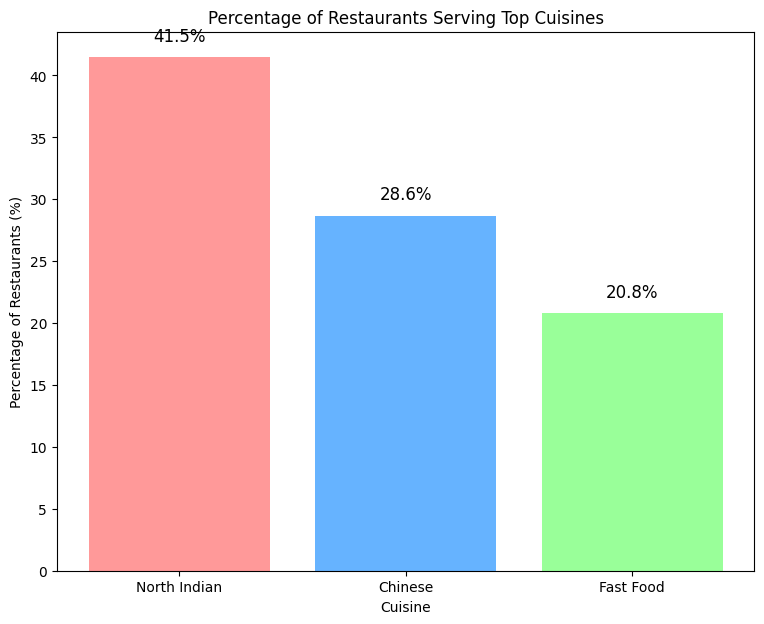

In [39]:
plt.figure(figsize=(9, 7))  # Adjust the size of the bar chart
plt.bar(top_cuisine_percentages.index, top_cuisine_percentages, color=['#ff9999','#66b3ff','#99ff99'])

# Step 2: Add labels and title
plt.xlabel('Cuisine')
plt.ylabel('Percentage of Restaurants (%)')
plt.title('Percentage of Restaurants Serving Top Cuisines')

# Step 3: Display percentage values on top of the bars
for i, v in enumerate(top_cuisine_percentages):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=12)

# Step 4: Show the plot
plt.show()

<span style="font-size: 26px; color: #2F4F4F; font-weight: bold; padding: 5px; background-color: #FFDAB9; border: 1px solid #FFB6A6; border-radius: 3px;">Task 2: City Analysis</span>


In [98]:
# Find the city with the highest number of restaurants
city_with_most_restaurants = df['City'].value_counts().idxmax()
num_restaurants_in_city = df['City'].value_counts().max()

print(f"The city with the highest number of restaurants is {city_with_most_restaurants} with {num_restaurants_in_city} restaurants.")


The city with the highest number of restaurants is New Delhi with 5473 restaurants.


In [12]:
avg_rating_per_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
avg_rating_per_city = avg_rating_per_city[avg_rating_per_city > 0]  # remove cities with 0 rating
avg_rating_per_city


City
Inner City                4.900000
Quezon City               4.800000
Makati City               4.650000
Pasig City                4.633333
Mandaluyong City          4.625000
Beechworth                4.600000
London                    4.535000
Taguig City               4.525000
Tagaytay City             4.500000
Secunderabad              4.500000
Lincoln                   4.500000
Orlando                   4.475000
Tampa Bay                 4.410000
Rest of Hawaii            4.410000
Tanunda                   4.400000
Palm Cove                 4.400000
Bangalore                 4.375000
Dubai                     4.370000
Pasay City                4.366667
Jakarta                   4.356250
Hyderabad                 4.344444
Chennai                   4.315000
Ankara                    4.305000
Tangerang                 4.300000
Mohali                    4.300000
Randburg                  4.300000
Sandton                   4.300000
Clatskanie                4.300000
Vernonia       

In [100]:
# Find the city with the highest average rating
city_with_highest_rating = city_avg_rating.idxmax()
highest_avg_rating = city_avg_rating.max()

print(f"The city with the highest average rating is {city_with_highest_rating} with an average rating of {highest_avg_rating:.2f}.")


The city with the highest average rating is Inner City with an average rating of 4.90.


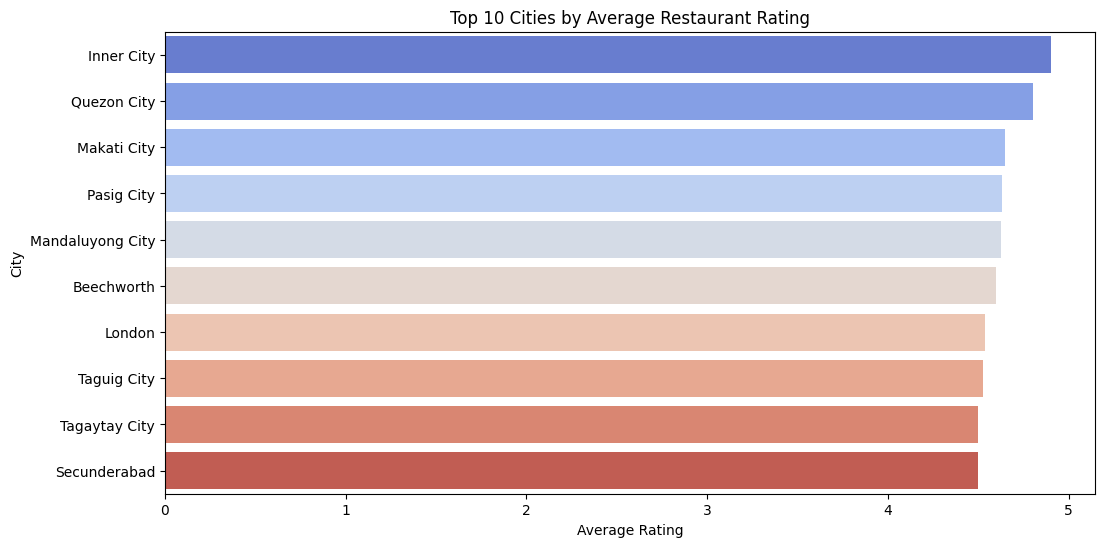

In [9]:
plt.figure(figsize=(12,6))
top_avg_rating = avg_rating_per_city.head(10)
sns.barplot(x=top_avg_rating.values, y=top_avg_rating.index, palette='coolwarm')
plt.title('Top 10 Cities by Average Restaurant Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()


<span style="font-size: 26px; color: #2F4F4F; font-weight: bold; padding: 5px; background-color: #FFDAB9; border: 1px solid #FFB6A6; border-radius: 3px;">Task 3: Price Range Distribution</span>


In [13]:
df['Price range'].unique()


array([3, 4, 2, 1], dtype=int64)

In [18]:
# Count of restaurants in each price range
price_range_counts = df['Price range'].value_counts().sort_index()
print(price_range_counts)


Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


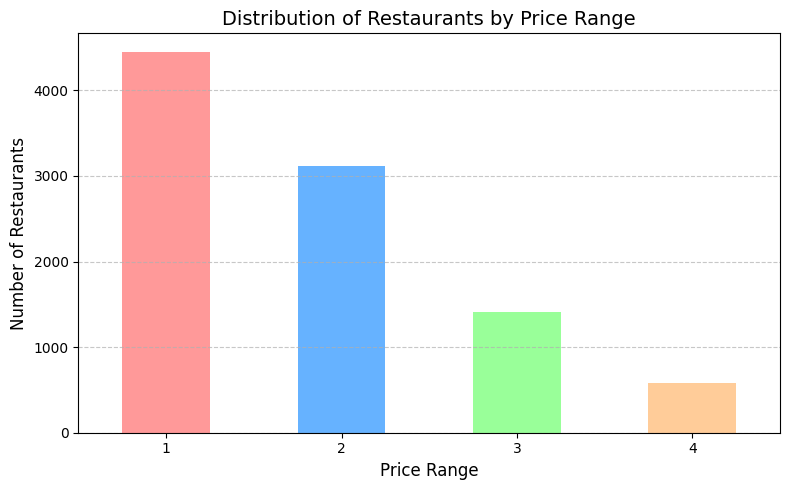

In [19]:
plt.figure(figsize=(8, 5))
price_range_counts.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Distribution of Restaurants by Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
total_restaurants = df.shape[0]
total_restaurants

9551

In [22]:
price_range_percentages = (price_range_counts / total_restaurants) * 100
print("Percentage of Restaurants in Each Price Range:")
print(price_range_percentages.round(2))

Percentage of Restaurants in Each Price Range:
Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


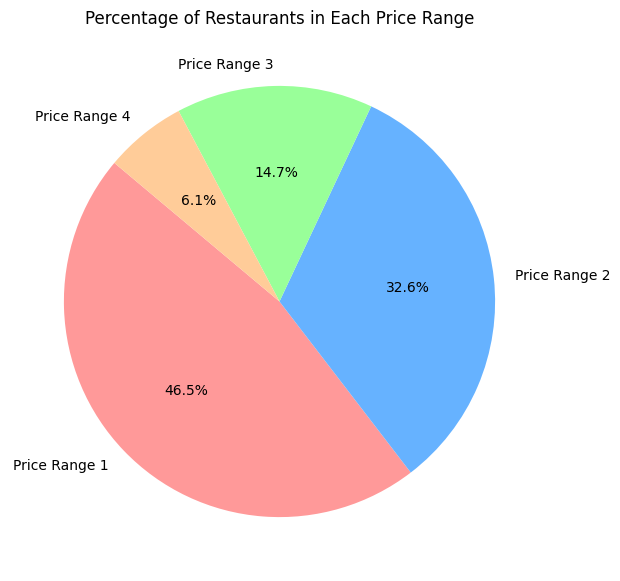

In [23]:
# Pie chart for percentages
plt.figure(figsize=(7, 7))
colors = ['#FF9999','#66B2FF','#99FF99','#FFCC99']
labels = price_range_percentages.index.map(lambda x: f'Price Range {x}')
plt.pie(price_range_percentages, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Percentage of Restaurants in Each Price Range')
plt.show()


<span style="font-size: 26px; color: #2F4F4F; font-weight: bold; padding: 5px; background-color: #FFDAB9; border: 1px solid #FFB6A6; border-radius: 3px;">Task 4: Online Delivery</span>


In [25]:
# Step 1: Count how many restaurants offer online delivery
delivery_count = df['Has Online delivery'].value_counts()
delivery_count

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [26]:
# Step 2: Calculate the percentage of restaurants that offer online delivery
delivery_percentage = (delivery_count['Yes'] / df.shape[0]) * 100
print(f"Percentage of restaurants offering online delivery: {delivery_percentage:.2f}%")

Percentage of restaurants offering online delivery: 25.66%


In [27]:
# Step 1: Calculate the average ratings for restaurants with and without online delivery
avg_rating_with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

# Step 2: Print the average ratings
print(f"Average rating for restaurants with online delivery: {avg_rating_with_delivery:.2f}")
print(f"Average rating for restaurants without online delivery: {avg_rating_without_delivery:.2f}")


Average rating for restaurants with online delivery: 3.25
Average rating for restaurants without online delivery: 2.47


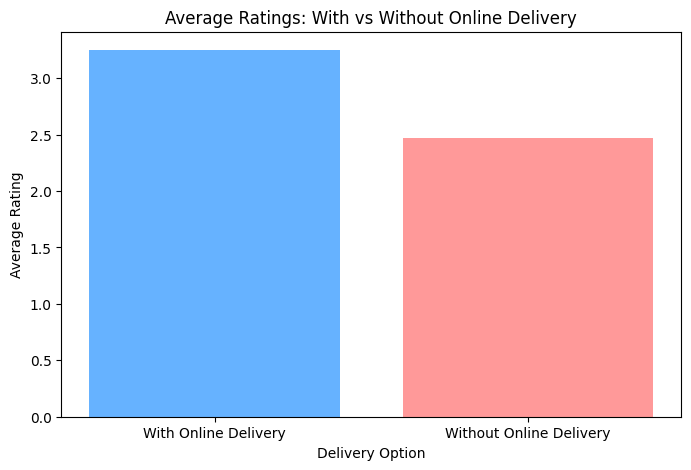

In [28]:
# Bar chart to compare average ratings
delivery_data = ['With Online Delivery', 'Without Online Delivery']
avg_ratings = [avg_rating_with_delivery, avg_rating_without_delivery]

plt.figure(figsize=(8, 5))
plt.bar(delivery_data, avg_ratings, color=['#66B2FF', '#FF9999'])
plt.title('Average Ratings: With vs Without Online Delivery')
plt.ylabel('Average Rating')
plt.xlabel('Delivery Option')
plt.show()
